# Árboles de decisión.

Un árbol de decisión es un predictor, $h: X \longrightarrow Y$, que predice la etiqueta asociada con una instancia $x$ viajando desde un nodo raíz de un árbol a una hoja (este es un algoritmo de clasificación, por lo que $Y \subset \mathbb{N}$). Para explicar un ejemplo simple, nos centramos en la  clasificación binaria, a saber, $Y = \{0, 1\}$, pero los árboles de decisión también se pueden aplicar para otros problemas de predicción con más de dos resultados ($Y$ puede ser un subconjunto de los números naturales). En cada nodo de la ruta de la raíz a la hoja, el hijo sucesor se elige sobre la base de una división del espacio de entrada. Por lo general, la división se basa en una de las características de x (atributo) o en un conjunto predefinido de reglas de división. Una hoja contiene una etiqueta específica. A continuación se pone un ejemplo de un árbol de decisión en el cuál nos dice si una papaya es sabrosa a partir de su color y suavidad (softness)

![title](DT.png)

Para verificar si una papaya dada es sabrosa o no, el árbol de decisión primero examina el color de la papaya. Si este color no está en el rango de verde pálido a amarillo pálido, entonces el árbol predice inmediatamente que la papaya no es sabrosa, sin realizar pruebas adicionales. De lo contrario (si está en el rango de colores), el árbol ahora examina la suavidad de la papaya. Si el nivel de suavidad de la papaya es tal que cede ligeramente la presión de la palma, el árbol de decisiones predice que la papaya es sabrosa. De lo contrario, la predicción es "no sabrosa". El ejemplo anterior subraya una de las principales ventajas de los árboles de decisión: el clasificador resultante es muy sencillo de entender e interpretar.

## Escogiendo los atributos de prueba.

La búsqueda utilizada en el aprendizaje del árbol de decisión está diseñada para minimizar aproximadamente la profundidad del árbol final. La idea es elegir el atributo que llegue lo más lejos posible para proporcionar una clasificación exacta de los ejemplos. Todo lo que necesitamos, entonces, es una medida formal de "que tan bueno es" y "realmente útil". Utilizaremos la noción de ***ganancia de entropia de información***, que se define en términos de entropía, la cantidad fundamental en la teoría de la información



La entropía es una medida de la incertidumbre de una variable aleatoria; la adquisición de información corresponde a una reducción de la entropía. Una variable aleatoria con un solo valor, por ejemplo una moneda en donde siempre sale cara, no tiene incertidumbre y, por lo tanto, su entropía se define como cero; por lo tanto, no obtenemos información al observar su valor. La entropía puede interpretarse también como el número de bits mínimo necesario para codificar la clasificación de cualquier miembro de tu conjunto de datos. Un lanzamiento de una moneda justa en donde es igualmente probable que salga cara o cruz, 0 o 1,  cuenta como "1 bit" de entropía. La tirada de un dado de cuatro lados tiene 2 bits de entropía, porque se necesitan dos bits para describir una de las cuatro opciones igualmente probables. Ahora considere una moneda injusta que sale cara el 99% del tiempo. Intuitivamente, esta moneda tiene menos incertidumbre que la moneda justa, si suponemos que las caras se equivocarán solo el 1% del tiempo, por lo que nos gustaría que tenga una medida de entropía cercana a cero, pero positiva. En general, la entropía de una variable aleatoria $V$ con valores $v_k$, cada uno con probabilidad $P(v_k)$, se define como
$$H(v) = \sum_{k}P(v_k)log_2\frac{1}{P(v_k)} = -\sum_{k}P(v_k)log_2P(v_k) $$

Ahora verifiquemos que la entropía de una moneda justa es 1 ("1 bit"):
$$H(fair\, coin) = -0.5log_2(0.5)-0.5log_2(0.5) = 1$$

Si la moneda está cargada de forma que el 99% de las veces caiga cara, se tiene:
$$H(loaded\,coin) = -0.99log_2(0.99)-0.01log_2(0.01)\approx 0.08$$

Para el dado de cuatro lados se tiene:
$$H(4-dice) = -0.25log_2(0.25)-0.25log_2(0.25)-0.25log_2(0.25)-0.25log_2(0.25) = 2$$


Ya vimos que es la entropía, ahora falta definir otra cantidad que nos dice la "ganancia" de información. Definimos la ganancia $G$ como:
$$G(D,A) = H(D)-\sum_{a_k}\frac{|S_{a_k}|}{|S|}H(S_{a_k})$$

en donde $a_k$ son los valores que puede tomar el atributo $A$, $S_{a_k}$ es el subconjunto de datos que tienen valor $a_k$ en el atributo $A$ y $|S|$ es la cardinalidad del conjunto de datos

# Algoritmo ID3

El algoritmo ID3 va seleccionando los atributos que producen mayor ganancia para generar el árbol de decisión.

Veamos un ejemplo de calculo de ganancia y entropía para un conjunto de datos

| A 	| B 	| C 	| E 	|
|---	|---	|---	|---	|
| 0 	| 1 	| 1 	| 1 	|
| 1 	| 1 	| 1 	| 1 	|
| 0 	| 0 	| 1 	| 0 	|
| 1 	| 0 	| 0 	| 1 	|
| 1 	| 1 	| 1 	| 1 	|

Este conjunto tiene los atributos A,B y C, mientras que E son las etiquetas que queremos predecir. Llamemos a este conjunto de datos "D". Hagamos los cálculos de entropia y de ganancia para cada atributo.


$$H(D) = -\frac{4}{5}log_2(\frac{4}{5})-\frac{1}{5}log_2(\frac{1}{5}) = 0.7219$$

$$G(D,A) = 0.7219 - \frac{3}{5}H(D_{A_1}) -  \frac{2}{5}H(D_{A_0})$$

$$G(D,B) = 0.7219 - \frac{3}{5}H(D_{B_1}) -  \frac{2}{5}H(D_{B_0})$$

$$G(D,C) = 0.7219 - \frac{4}{5}H(D_{C_1}) -  \frac{1}{5}H(D_{C_0})$$

Calculamos las entropías restantes:
$$H(D_{A_1}) = - \frac{3}{3}log_2(\frac{3}{3}) = 0$$

$$H(D_{A_0}) = - \frac{1}{2}log_2(\frac{1}{2}) - \frac{1}{2}log_2(\frac{1}{2}) = 1$$

$$H(D_{B_1}) = - \frac{3}{3}log_2(\frac{3}{3}) = 0$$

$$H(D_{B_0}) = - \frac{1}{2}log_2(\frac{1}{2}) - \frac{1}{2}log_2(\frac{1}{2}) = 1$$

$$H(D_{C_1}) = -\frac{3}{4}log_2(\frac{3}{4}) -\frac{1}{4}log_2(\frac{1}{4}) = 0.8113$$ 

$$H(D_{C_0}) = - \frac{1}{1}log_2(\frac{1}{1}) = 0$$


Las ganancias quedan finalmente como:
$$G(D,A) = 0.7219 - \frac{3}{5}(0) -  \frac{2}{5}(1) = 0.3219$$

$$G(D,B) = 0.7219 - \frac{3}{5}(0) -  \frac{2}{5}(1) = 0.3219$$

$$G(D,C) = 0.7219 - \frac{4}{5}(0.8113) -  \frac{1}{5}(0) = 0.07286$$

Al tener dos atributos con la misma ganancia se escoge uno de manera aleatoria, ya que tanto A como B tienen la ganancia máxima. Este proceso se hace sucesivamente hasta tomar en cuenta todos los atributos.

## Prunning (Poda)

El algoritmo ID3 descrito anteriormente todavía tiene un gran problema: el árbol devuelto generalmente será muy grande y también puede haber un sobreajuste en los datos (overfitting). Esos árboles pueden tener un riesgo empírico bajo, pero su verdadero riesgo tenderá a ser alto, tanto de acuerdo con nuestro análisis teórico como en la práctica. Una solución es limitar el número de iteraciones de ID3, lo que lleva a un árbol con un número limitado de nodos. Otra solución común es ***podar*** el árbol después de su construcción, con la esperanza de reducirlo a un árbol mucho más pequeño, pero aún con un error empírico similar.  Por lo general, la poda se realiza mediante una caminata de abajo hacia arriba en el árbol. Cada nodo puede ser reemplazado con uno de sus subárboles o con una hoja.

# Utilizando aŕboles de decisión con scikit-learn

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
dataset = pd.read_csv("data_log_2.csv")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
X = dataset.iloc[:,[2,3]].values

In [7]:
X.shape

(400, 2)

In [8]:
y = dataset["Purchased"].values

In [47]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [48]:
dt 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
dt.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,

In [51]:
def mapa_colores(y):
    y = np.array(y)
    y = y.ravel()
    mc = []
    for i in y:
        if i == 0:
            mc.append("blue")
        else:
            mc.append("red")
    return mc 

In [52]:
mapa_1 = mapa_colores(y)


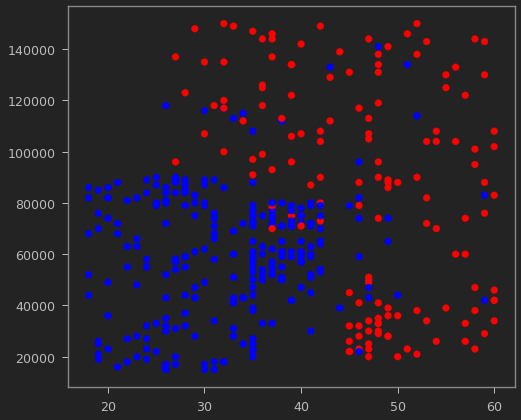

In [53]:
plt.scatter(X[:,0],X[:,1], c = mapa_1)

In [54]:
pred = dt.predict(X)

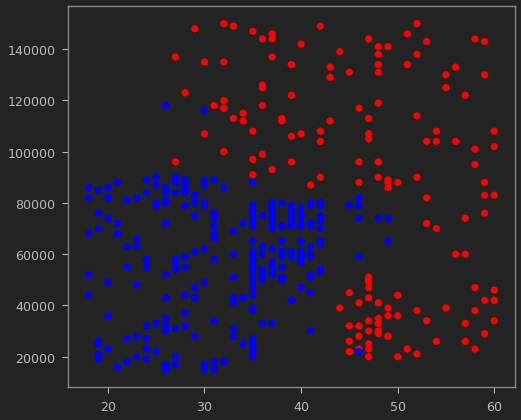

In [55]:
plt.scatter(X[:,0],X[:,1], c = mapa_colores(pred))

In [56]:
from sklearn.metrics import confusion_matrix


In [57]:
confusion_matrix(y,pred)

array([[241,  16],
       [  9, 134]])

In [58]:
x_coord = np.linspace(10,70,1000)
y_coord = np.linspace(10000,160000,1000)

In [59]:
X_c,Y_c = np.meshgrid(x_coord,y_coord)

In [60]:
X_grid = np.concatenate((X_c.ravel().reshape((-1,1)),Y_c.ravel().reshape((-1,1))), axis = 1)

In [61]:
X_grid.shape

(1000000, 2)

In [62]:
pred_grid = dt.predict(X_grid)

In [63]:
pred_grid = pred_grid.reshape((1000,1000))

In [64]:
from matplotlib.colors import ListedColormap


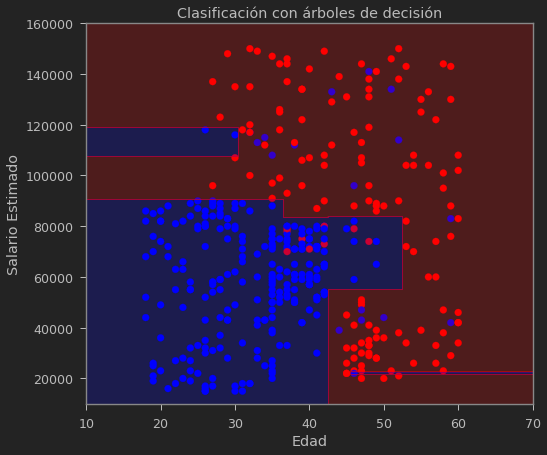

In [65]:
plt.scatter(X[:,0],X[:,1], c = mapa_1)
plt.contourf(X_c,Y_c,pred_grid, alpha=0.2, cmap=ListedColormap(("blue","red")))
plt.title("Clasificación con árboles de decisión")
plt.xlabel("Edad")
plt.ylabel("Salario Estimado")
plt.show()

hyperparameter tuning, selección de parámetros

# Random forests

Otra forma de reducir el peligro de sobreajuste (overfitting) es mediante la construcción de un conjunto de árboles. En particular, a continuación describimos el método de ***bosques aleatorios (random forests)***

Un bosque aleatorio es un clasificador que consiste en una colección de árboles de decisión, donde cada árbol se construye aplicando un algoritmo A en el conjunto de entrenamiento $S$ y un vector aleatorio adicional, $\theta$, donde $\theta$ se muestrea de alguna distribución. La predicción del bosque aleatorio se obtiene por mayoría de votos sobre las predicciones de los árboles individuales.

Para especificar un bosque aleatorio particular, necesitamos definir el algoritmo $A$ y la distribución sobre $\theta$. Hay muchas formas de hacer esto y aquí describimos una opción en particular. Generamos $\theta$ de la siguiente manera. Primero, tomamos una submuestra aleatoria de $S$; a saber, muestreamos un nuevo conjunto de entrenamiento $S^\prime$ de tamaño $m^\prime$ usando la distribución uniforme sobre $S$. Segundo, construimos una sucesión $I_1, I_2,\dots,$ donde cada $I_t$ es un subconjunto de $[d]$ ($d$ es el número de atributos o características del dataset) de tamaño $k$, que se genera mediante el muestreo uniforme de elementos aleatorios de $[d]$. Todas estas variables aleatorias forman el vector $\theta$. Luego, el algoritmo $A$ desarrolla un árbol de decisión (por ejemplo, usando el algoritmo ID3) basado en la muestra $S^\prime$, donde en cada etapa de división del algoritmo, el algoritmo se limita a elegir una característica que maximice la ganancia del conjunto $I_t$. Intuitivamente, si $k$ es pequeño, esta restricción puede evitar el sobreajuste.


## Random forests con scikit-learn

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier(criterion="entropy", n_estimators=15, max_depth=10)

In [74]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
pred_rf = rf.predict(X)

In [76]:
confusion_matrix(y,pred_rf)

array([[253,   4],
       [  4, 139]])

In [77]:
pred_grid_rf = rf.predict(X_grid)

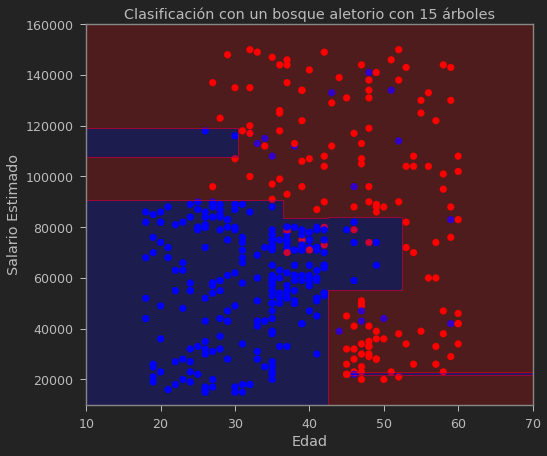

In [78]:
plt.scatter(X[:,0],X[:,1], c = mapa_1)
plt.contourf(X_c,Y_c,pred_grid, alpha=0.2, cmap=ListedColormap(("blue","red")))
plt.title("Clasificación con un bosque aletorio con 15 árboles")
plt.xlabel("Edad")
plt.ylabel("Salario Estimado")
plt.show()